#  Q-learning

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Саттон Р.	С.,	Барто Э. Дж. Обучение с подкреплением: Введение. 2-е изд.
* https://gymnasium.farama.org/tutorials/training_agents/blackjack_tutorial/
* https://en.wikipedia.org/wiki/Q-learning
* https://www.baeldung.com/cs/epsilon-greedy-q-learning
* https://pythonprogramming.net/q-learning-reinforcement-learning-python-tutorial/
* https://www.datacamp.com/tutorial/introduction-q-learning-beginner-tutorial
* https://rubikscode.net/2021/07/20/introduction-to-double-q-learning/
* https://gymnasium.farama.org/api/wrappers/misc_wrappers/#gymnasium.wrappers.RecordVideo

## Задачи для совместного разбора

1\. Рассмотрите понятие Q-функции, ее применение для формирования политики агента и способов ее создания.

In [ ]:
import numpy as np

In [ ]:
actions = [0, 1]
states = [0, 1, 2]

q_table = np.random.uniform(-1, 1, size=(len(states), len(actions)))
q_table.shape

(3, 2)

In [ ]:
state = 1
q_table[state].argmax()

1

In [ ]:
states = np.array([
    [0, 0],
    [1, 0],
    [1, 2]
])

actions = [0, 1]

q_table =  np.random.uniform(-1, 1, size=(*states.shape, len(actions)))
q_table.shape

(3, 2, 2)

In [ ]:
state = [0, 0]

q_table[0, 0]

array([0.21395069, 0.81045144])

In [ ]:
states = np.array([
    [0.2, 0.5],
    [1.3, 0.7],
    [0.8, 1.3]
])

In [ ]:
states = np.array([
    [0, 0],
    [1, 0],
    [0, 1]
])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Обучите агента для игры в блэкджек (окружение `Blackjack-v1`), используя алгоритм Q-learning. Для создания таблицы Q-функции выясните размеры пространства состояния игры и количество возможных действий игрока и выведите эти значения на экран. Во время обучения несколько раз вычислите статистику за `print_every` последних эпизодов: количество выигранных и проигранных сессий. После завершения обучения визуализируйте полученные данные. Изучите, как выглядит Q-функция (в каких состояниях игрок будет брать карту, в каких - нет). Cыграйте `N=10000` игр, применяя стратегию, выведенную из обученной Q-функции, посчитайте и выведите на экран долю выигранных игр.

Cтратегия для выбора действия:
$$a_{t+1}(s_t) = argmax_aQ(s_t, a)$$

Правило обновления Q-функции:

![q-learning](https://wikimedia.org/api/rest_v1/media/math/render/svg/d247db9eaad4bd343e7882ec546bf3847ebd36d8)

- [ ] Проверено на семинаре

 Для создания таблицы Q-функции выясните размеры пространства состояния игры и количество возможных действий игрока и выведите эти значения на экран

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import gymnasium as gym
import numpy as np
from tqdm import tqdm
from dataclasses import dataclass
from collections import defaultdict
from typing import List

In [2]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.0 MB/s eta 0:00:00


In [4]:
env = gym.make('Blackjack-v1')

# Размер пространства состояний
state_space_size = env.observation_space[0].n
print(f"Размер пространства состояний: {state_space_size}")

# Количество возможных действий игрока
action_space_size = env.action_space.n
print(f"Количество возможных действий игрока: {action_space_size}")


Размер пространства состояний: 32
Количество возможных действий игрока: 2


In [5]:
@dataclass
class Config:
    discount: float = 0.95
    lr: float = 0.005
    n_episodes: float = 100_000
    print_every: int = 5000

In [6]:
class Agent:
    def __init__(self, env, config: Config):
        self.env = env
        self.cfg = config
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

    def _create_q_table(self):
        # напишите код для создания таблицы Q-функции
        # для окружения Blackjack должен получиться массив 32x11x2x2
        # Размеры: (сумма карт игрока, карта дилера, наличие туза у игрока, действие игрока)
      player_sum_space = 32  # Сумма карт игрока может варьироваться от 4 до 31
      dealer_card_space = 11  # Карта дилера может быть от 1 до 10
      has_ace_space = 2  # Наличие туза у игрока (0 - отсутствие туза, 1 - наличие туза)
      action_space = 2  # Действие игрока (0 - "Stand", 1 - "Hit")

      # Создание таблицы Q-функции и инициализация нулями
      self.q_table = np.zeros((player_sum_space, dealer_card_space, has_ace_space, action_space))


    def get_action(self, state: np.ndarray) -> int:
        # найдите и верните индекс максимума Q-функции для состояния state
        # обратите внимание, что максимумов может быть несколько
        # сли есть несколько действий с одинаковым максимальным значением Q-функции, агент будет случайным образом выбирать одно из них
        max_indices = np.where(self.q_values[state] == np.max(self.q_values[state]))[0]
        return np.random.choice(max_indices)


    def update_q_table(self, state: np.ndarray, new_state: np.ndarray, reward: float, action: int, done: bool) -> None:
        # напишите код для обновления Q-функции согласно правилу выше
        # если эпизод закончен, то будущая награда равна 0
      if done:
          future_reward = 0
      else:
          future_reward = self.q_values[new_state][action].max()

      self.q_values[state][action] += (1 - self.cfg.lr) * self.q_values[state][action] + self.cfg.lr * (reward + self.cfg.discount * future_reward)


    def run_episode(self) -> float:
        done = False
        state, info = self.env.reset()
        while not done:
            action = self.get_action(state)
            new_state, reward, terminated, truncated, info = self.env.step(action)
            done = terminated or truncated
            self.update_q_table(state, new_state, reward, action, done)
            state = new_state

            if done:
                return reward

    def train(self):
        ep_rewards = []
        stats = {'win': 0, 'lose': 0, 'tie': 0}

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode()
            ep_rewards.append(reward)

            if reward > 0:
                stats['win'] += 1
            elif reward < 0:
                stats['lose'] += 1
            else:
                stats['tie'] += 1

            if ep % self.cfg.print_every == 0 and ep >= self.cfg.print_every:
                recent_stats = ep_rewards[ep - self.cfg.print_every : ep]

                recent_wins = sum(1 for r in recent_stats if r > 0)
                recent_losses = sum(1 for r in recent_stats if r < 0)
                recent_ties = sum(1 for r in recent_stats if r == 0)

                print(f"Эпизод {ep}, Последние {self.cfg.print_every} эпизодов: "
                      f"Выигрыши: {recent_wins}, Проигрыши: {recent_losses}, Ничьи: {recent_ties}")

        return ep_rewards, stats

def visualize_results(ep_rewards, stats):
    plt.figure(figsize=(18, 8))

    # Гистограмма выигрышей, проигрышей и ничьих
    plt.subplot(1, 3, 1)
    colors = ['lightcoral', 'lightgreen', 'lightskyblue']
    plt.bar(stats.keys(), stats.values(), color=colors)
    plt.title('Результаты выигрышей/проигрышей/ничьих')
    plt.xlabel('Результат')
    plt.ylabel('Количество')
    plt.grid(axis='y', linestyle='--')

Во время обучения несколько раз вычислите статистику за print_every последних эпизодов: количество выигранных и проигранных сессий

In [9]:
config = Config()
agent = Agent(env, config = Config)
ep_rewards, stats = agent.train()
# Print the final statistics
print(f"Final Win Count: {stats['win']}")
print(f"Final Lose Count: {stats['lose']}")
print(f"Final Tie Count: {stats['tie']}")
print(f"Win%: {stats['win']/ len(ep_rewards) * 100}%")

  6%|▌         | 5634/100000 [00:02<00:19, 4730.71it/s]

Эпизод 5000, Последние 5000 эпизодов: Выигрыши: 1914, Проигрыши: 2821, Ничьи: 265


 11%|█         | 10870/100000 [00:03<00:15, 5822.45it/s]

Эпизод 10000, Последние 5000 эпизодов: Выигрыши: 1924, Проигрыши: 2823, Ничьи: 253


 16%|█▌        | 15973/100000 [00:03<00:15, 5466.99it/s]

Эпизод 15000, Последние 5000 эпизодов: Выигрыши: 1989, Проигрыши: 2765, Ничьи: 246


 21%|██        | 20584/100000 [00:04<00:14, 5601.00it/s]

Эпизод 20000, Последние 5000 эпизодов: Выигрыши: 1894, Проигрыши: 2851, Ничьи: 255


 26%|██▌       | 25897/100000 [00:05<00:13, 5654.11it/s]

Эпизод 25000, Последние 5000 эпизодов: Выигрыши: 1928, Проигрыши: 2823, Ничьи: 249


 29%|██▉       | 29419/100000 [00:06<00:14, 4757.54it/s]<ipython-input-6-b026dcaaf20f>:36: RuntimeWarning: overflow encountered in double_scalars
  self.q_values[state][action] += (1 - self.cfg.lr) * self.q_values[state][action] + self.cfg.lr * (reward + self.cfg.discount * future_reward)
 30%|███       | 30379/100000 [00:06<00:17, 3953.70it/s]

Эпизод 30000, Последние 5000 эпизодов: Выигрыши: 1893, Проигрыши: 2852, Ничьи: 255


 36%|███▌      | 35600/100000 [00:08<00:17, 3684.78it/s]

Эпизод 35000, Последние 5000 эпизодов: Выигрыши: 1831, Проигрыши: 2922, Ничьи: 247


 40%|████      | 40340/100000 [00:09<00:16, 3663.06it/s]

Эпизод 40000, Последние 5000 эпизодов: Выигрыши: 1937, Проигрыши: 2804, Ничьи: 259


 46%|████▌     | 45940/100000 [00:11<00:11, 4597.06it/s]

Эпизод 45000, Последние 5000 эпизодов: Выигрыши: 1872, Проигрыши: 2885, Ничьи: 243


 51%|█████     | 51067/100000 [00:12<00:09, 5393.54it/s]

Эпизод 50000, Последние 5000 эпизодов: Выигрыши: 1912, Проигрыши: 2849, Ничьи: 239


 56%|█████▌    | 55831/100000 [00:12<00:07, 5611.54it/s]

Эпизод 55000, Последние 5000 эпизодов: Выигрыши: 1828, Проигрыши: 2907, Ничьи: 265


 61%|██████    | 61149/100000 [00:13<00:06, 5758.73it/s]

Эпизод 60000, Последние 5000 эпизодов: Выигрыши: 1828, Проигрыши: 2936, Ничьи: 236


 66%|██████▌   | 65908/100000 [00:14<00:05, 5908.37it/s]

Эпизод 65000, Последние 5000 эпизодов: Выигрыши: 1938, Проигрыши: 2833, Ничьи: 229


 71%|███████   | 70647/100000 [00:15<00:04, 5926.82it/s]

Эпизод 70000, Последние 5000 эпизодов: Выигрыши: 1885, Проигрыши: 2874, Ничьи: 241


 76%|███████▌  | 76004/100000 [00:16<00:04, 5773.00it/s]

Эпизод 75000, Последние 5000 эпизодов: Выигрыши: 1830, Проигрыши: 2918, Ничьи: 252


 81%|████████  | 80660/100000 [00:17<00:03, 5399.80it/s]

Эпизод 80000, Последние 5000 эпизодов: Выигрыши: 1892, Проигрыши: 2853, Ничьи: 255


 86%|████████▌ | 85892/100000 [00:18<00:02, 5656.73it/s]

Эпизод 85000, Последние 5000 эпизодов: Выигрыши: 1896, Проигрыши: 2838, Ничьи: 266


 91%|█████████ | 91059/100000 [00:19<00:01, 5540.52it/s]

Эпизод 90000, Последние 5000 эпизодов: Выигрыши: 1848, Проигрыши: 2902, Ничьи: 250


 96%|█████████▌| 95700/100000 [00:19<00:00, 5616.37it/s]

Эпизод 95000, Последние 5000 эпизодов: Выигрыши: 1925, Проигрыши: 2825, Ничьи: 250


100%|██████████| 100000/100000 [00:20<00:00, 4842.13it/s]

Final Win Count: 37859
Final Lose Count: 57115
Final Tie Count: 5026
Win%: 37.858999999999995%


После завершения обучения визуализируйте полученные данные

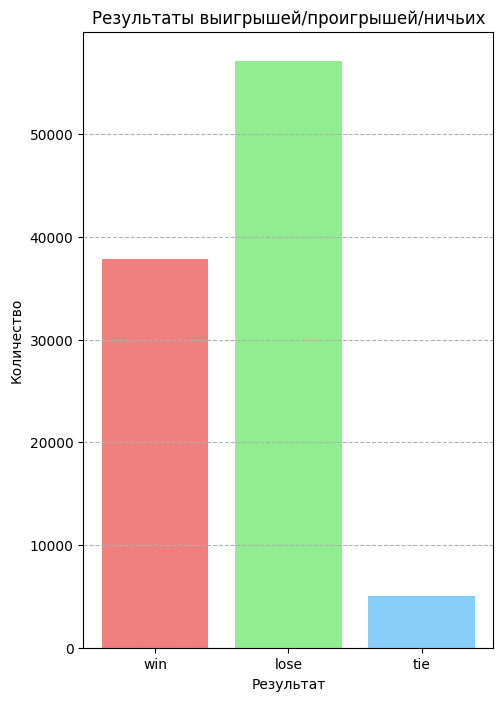

In [10]:
visualize_results(ep_rewards, stats)

 Cыграйте N=10000 игр, применяя стратегию, выведенную из обученной Q-функции, посчитайте и выведите на экран долю выигранных игр.

In [11]:
wins = 0
loses = 0
ties = 0
N=10_000

for _ in range(N):
    state, _ = env.reset()
    done = False

    while not done:
        action = np.argmax(agent.q_values[state])
        state, reward, done, _, _ = env.step(action)

    if reward > 0:
        wins += 1
    elif reward < 0:
        loses += 1
    elif reward == 0:
        ties += 1

# Выводим результаты
win_rate = wins / 10000
lose_rate = loses / 10000
tie_rate = ties / 10000

print(f"Доля выигранных игр: {win_rate:.4f}")
print(f"Доля проигранных игр: {lose_rate:.4f}")
print(f"Доля игр в ничью: {tie_rate:.4f}")

Доля выигранных игр: 0.3850
Доля проигранных игр: 0.5649
Доля игр в ничью: 0.0501


<p class="task" id="2"></p>

2\. Повторите решение предыдущей задачи, используя алгоритм $\epsilon$-greedy Q-learning. Исследуйте, как гиперпараметры и способ инициализации значений Q-функции влияют на результат.

Cтратегия для выбора действия:
1. Сгенерировать число $p$ из $U(0, 1)$;
2. Если $p < \epsilon$, то выбрать действие случайным образом;
3. В противном случае $a_{t+1}(s_t) = argmax_aQ(s_t, a)$.

Правило обновления Q-функции:
![q-learning](https://wikimedia.org/api/rest_v1/media/math/render/svg/d247db9eaad4bd343e7882ec546bf3847ebd36d8)

- [ ] Проверено на семинаре

In [43]:
from dataclasses import dataclass

@dataclass
class Config1:
    discount: float = 0.95
    lr: float = 0.005
    n_episodes: float = 100_000
    epsilon: float = 0.01
    final_epsilon: float = 0.1
    print_every: int = 10_000

    def method(self):
      pass

In [58]:
class Config2:
  def __init__(self, discount=1, lr=0.005, n_episodes=100_000, epsilon=0.001, final_epsilon=0.01, print_every=5_000):
    self.discount = discount
    self.lr = lr
    self.n_episodes = n_episodes
    self.epsilon = epsilon
    self.final_epsilon = final_epsilon
    self.print_every = print_every

In [45]:
class Config3:
  def __init__(self, discount=0.3, lr=0.5, n_episodes=100_000, epsilon=0.5, final_epsilon=0.5, print_every=5_000):
    self.discount = discount
    self.lr = lr
    self.n_episodes = n_episodes
    self.epsilon = epsilon
    self.final_epsilon = final_epsilon
    self.print_every = print_every

In [46]:
class EpsilonGreedyAgent(Agent):
    def __init__(self, env, config: Config, epsilon: float):
        super().__init__(env, config)
        self.epsilon = epsilon

    def get_action(self, state: np.ndarray) -> int:
        if np.random.random() < self.epsilon: # тут p
            # Выбрать случайное действие с вероятностью epsilon
            return np.random.choice(self.env.action_space.n)
        else:
            # Иначе выбрать действие с максимальным Q-значением
            return np.argmax(self.q_values[state])

In [47]:
agent = EpsilonGreedyAgent(env, Config2(), epsilon=0.01)
ep_rewards, stats = agent.train()
# Print the final statistics
print(f"Final Win Count: {stats['win']}")
print(f"Final Lose Count: {stats['lose']}")
print(f"Final Tie Count: {stats['tie']}")
print(f"Win%: {stats['win']/ len(ep_rewards) * 100}%")

 11%|█         | 11226/100000 [00:01<00:13, 6609.27it/s]

Эпизод 10000, Последние 10000 эпизодов: Выигрыши: 3791, Проигрыши: 5650, Ничьи: 559


 21%|██        | 20880/100000 [00:03<00:11, 6959.39it/s]

Эпизод 20000, Последние 10000 эпизодов: Выигрыши: 3724, Проигрыши: 5741, Ничьи: 535


 29%|██▉       | 29109/100000 [00:05<00:16, 4175.00it/s]<ipython-input-6-b026dcaaf20f>:36: RuntimeWarning: overflow encountered in double_scalars
  self.q_values[state][action] += (1 - self.cfg.lr) * self.q_values[state][action] + self.cfg.lr * (reward + self.cfg.discount * future_reward)
 30%|███       | 30393/100000 [00:05<00:16, 4142.03it/s]

Эпизод 30000, Последние 10000 эпизодов: Выигрыши: 3816, Проигрыши: 5664, Ничьи: 520


 41%|████      | 41011/100000 [00:07<00:10, 5370.39it/s]

Эпизод 40000, Последние 10000 эпизодов: Выигрыши: 3765, Проигрыши: 5745, Ничьи: 490


 51%|█████▏    | 51301/100000 [00:09<00:07, 6860.91it/s]

Эпизод 50000, Последние 10000 эпизодов: Выигрыши: 3633, Проигрыши: 5850, Ничьи: 517


 61%|██████    | 60853/100000 [00:10<00:05, 6590.36it/s]

Эпизод 60000, Последние 10000 эпизодов: Выигрыши: 3721, Проигрыши: 5760, Ничьи: 519


 71%|███████   | 71190/100000 [00:12<00:04, 6865.30it/s]

Эпизод 70000, Последние 10000 эпизодов: Выигрыши: 3738, Проигрыши: 5774, Ничьи: 488


 81%|████████  | 80825/100000 [00:13<00:02, 6668.66it/s]

Эпизод 80000, Последние 10000 эпизодов: Выигрыши: 3718, Проигрыши: 5782, Ничьи: 500


 91%|█████████▏| 91289/100000 [00:15<00:01, 6855.73it/s]

Эпизод 90000, Последние 10000 эпизодов: Выигрыши: 3705, Проигрыши: 5795, Ничьи: 500


100%|██████████| 100000/100000 [00:16<00:00, 5982.67it/s]

Final Win Count: 37335
Final Lose Count: 57561
Final Tie Count: 5104
Win%: 37.335%


In [48]:
agent = EpsilonGreedyAgent(env, Config3(), epsilon=0.5)
ep_rewards, stats = agent.train()
# Print the final statistics
print(f"Final Win Count: {stats['win']}")
print(f"Final Lose Count: {stats['lose']}")
print(f"Final Tie Count: {stats['tie']}")
print(f"Win%: {stats['win']/ len(ep_rewards) * 100}%")

  6%|▌         | 6098/100000 [00:01<00:15, 6084.39it/s]

Эпизод 5000, Последние 5000 эпизодов: Выигрыши: 1712, Проигрыши: 3035, Ничьи: 253


 11%|█         | 10605/100000 [00:02<00:23, 3724.95it/s]

Эпизод 10000, Последние 5000 эпизодов: Выигрыши: 1615, Проигрыши: 3124, Ничьи: 261


 15%|█▌        | 15282/100000 [00:03<00:23, 3676.37it/s]

Эпизод 15000, Последние 5000 эпизодов: Выигрыши: 1637, Проигрыши: 3102, Ничьи: 261


 21%|██        | 20673/100000 [00:04<00:20, 3954.63it/s]

Эпизод 20000, Последние 5000 эпизодов: Выигрыши: 1650, Проигрыши: 3098, Ничьи: 252


 26%|██▌       | 25836/100000 [00:05<00:12, 5865.72it/s]

Эпизод 25000, Последние 5000 эпизодов: Выигрыши: 1665, Проигрыши: 3114, Ничьи: 221


 31%|███       | 30944/100000 [00:06<00:10, 6308.99it/s]

Эпизод 30000, Последние 5000 эпизодов: Выигрыши: 1668, Проигрыши: 3084, Ничьи: 248


 36%|███▌      | 36024/100000 [00:07<00:10, 6168.53it/s]

Эпизод 35000, Последние 5000 эпизодов: Выигрыши: 1713, Проигрыши: 3058, Ничьи: 229


 41%|████      | 41162/100000 [00:08<00:09, 6469.22it/s]

Эпизод 40000, Последние 5000 эпизодов: Выигрыши: 1696, Проигрыши: 3058, Ничьи: 246


 46%|████▌     | 45679/100000 [00:09<00:08, 6198.75it/s]

Эпизод 45000, Последние 5000 эпизодов: Выигрыши: 1681, Проигрыши: 3078, Ничьи: 241


 51%|█████     | 50788/100000 [00:09<00:07, 6241.87it/s]

Эпизод 50000, Последние 5000 эпизодов: Выигрыши: 1675, Проигрыши: 3113, Ничьи: 212


 56%|█████▌    | 55967/100000 [00:10<00:07, 6248.34it/s]

Эпизод 55000, Последние 5000 эпизодов: Выигрыши: 1629, Проигрыши: 3121, Ничьи: 250


 59%|█████▊    | 58522/100000 [00:11<00:06, 6336.90it/s]<ipython-input-6-b026dcaaf20f>:36: RuntimeWarning: overflow encountered in double_scalars
  self.q_values[state][action] += (1 - self.cfg.lr) * self.q_values[state][action] + self.cfg.lr * (reward + self.cfg.discount * future_reward)
 61%|██████    | 61098/100000 [00:11<00:06, 6264.93it/s]

Эпизод 60000, Последние 5000 эпизодов: Выигрыши: 1701, Проигрыши: 3098, Ничьи: 201


 66%|██████▌   | 66164/100000 [00:12<00:05, 6130.98it/s]

Эпизод 65000, Последние 5000 эпизодов: Выигрыши: 1659, Проигрыши: 3091, Ничьи: 250


 71%|███████▏  | 71278/100000 [00:13<00:04, 6274.47it/s]

Эпизод 70000, Последние 5000 эпизодов: Выигрыши: 1622, Проигрыши: 3123, Ничьи: 255


 76%|███████▌  | 75656/100000 [00:13<00:03, 6154.54it/s]

Эпизод 75000, Последние 5000 эпизодов: Выигрыши: 1692, Проигрыши: 3061, Ничьи: 247


 81%|████████  | 80777/100000 [00:14<00:03, 6215.09it/s]

Эпизод 80000, Последние 5000 эпизодов: Выигрыши: 1704, Проигрыши: 3090, Ничьи: 206


 85%|████████▌ | 85284/100000 [00:15<00:02, 6080.73it/s]

Эпизод 85000, Последние 5000 эпизодов: Выигрыши: 1725, Проигрыши: 3031, Ничьи: 244


 90%|█████████ | 90495/100000 [00:16<00:02, 3643.63it/s]

Эпизод 90000, Последние 5000 эпизодов: Выигрыши: 1690, Проигрыши: 3062, Ничьи: 248


 96%|█████████▌| 95632/100000 [00:18<00:01, 3622.42it/s]

Эпизод 95000, Последние 5000 эпизодов: Выигрыши: 1629, Проигрыши: 3135, Ничьи: 236


100%|██████████| 100000/100000 [00:19<00:00, 5114.19it/s]

Final Win Count: 33468
Final Lose Count: 61727
Final Tie Count: 4805
Win%: 33.467999999999996%


<p class="task" id="3"></p>

3\. Повторите решение задачи 1, используя алгоритм double Q-learning.

Cтратегия для выбора действия:
1. Сгенерировать число $p$ из $U(0, 1)$;
2. Если $p < \epsilon$, то выбрать действие случайным образом;
3. В противном случае $a_{t+1}(s_t) = argmax_a\left((Q^A_t + Q^B_t)(s_t, a))\right) $.

Правило обновления Q-функции:
$$
Q^A_{t+1}(s_{t}, a_{t}) = Q^A_{t}(s_{t}, a_{t}) + \alpha_{t}(s_{t}, a_{t}) \left(r_{t} + \gamma Q^B_{t}\left(s_{t+1}, {arg~max}_{a} Q^A_t(s_{t+1}, a)\right) - Q^A_{t}(s_{t}, a_{t})\right)
$$

$$
Q^B_{t+1}(s_{t}, a_{t}) = Q^B_{t}(s_{t}, a_{t}) + \alpha_{t}(s_{t}, a_{t}) \left(r_{t} + \gamma Q^A_{t}\left(s_{t+1}, {arg~max}_{a} Q^B_t(s_{t+1}, a)\right) - Q^B_{t}(s_{t}, a_{t})\right)
$$


- [ ] Проверено на семинаре

In [59]:
class DoubleAgent:
    def __init__(self, env, config):
        self.env = env
        self.cfg = config
        self.q_table_a = self._create_q_table()
        self.q_table_b = self._create_q_table()
        self.active_q_table = self.q_table_a

    def _create_q_table(self):
        player_sum_space = 32
        dealer_card_space = 11
        has_ace_space = 2
        action_space = 2

        # Creating the Q-table and initializing with zeros
        return np.zeros((player_sum_space, dealer_card_space, has_ace_space, action_space))

    def get_action(self, state: np.ndarray) -> int:
        p = np.random.random()

        if p < self.cfg.epsilon:
            return np.random.choice(self.env.action_space.n)
        else:
            max_indices = np.where(self.active_q_table[state] == np.max(self.active_q_table[state]))[0]
            return np.random.choice(max_indices)

    def update_q_table(self, state: np.ndarray, new_state: np.ndarray, reward: float, action: int, done: bool) -> None:
        self.q_table_a[state][action] = self.q_table_a[state][action] + self.cfg.lr * (
            reward * done + self.cfg.discount * self.q_table_b[new_state][np.argmax(self.q_table_a[new_state][action])] - self.q_table_a[state][action]
        )
        self.q_table_b[state][action] = self.q_table_b[state][action] + self.cfg.lr * (
            reward * done + self.cfg.discount * self.q_table_a[new_state][np.argmax(self.q_table_b[new_state][action])] - self.q_table_b[state][action]
        )

    def run_episode(self) -> float:
        done = False
        state, info = self.env.reset()
        while not done:
            action = self.get_action(state)
            new_state, reward, terminated, truncated, info = self.env.step(action)
            done = terminated or truncated
            self.update_q_table(state, new_state, reward, action, done)
            state = new_state

            if done:
                return reward

    def train(self):
        ep_rewards = []
        stats = {'win': 0, 'lose': 0, 'tie': 0}

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode()
            ep_rewards.append(reward)

            if reward > 0:
                stats['win'] += 1
            elif reward < 0:
                stats['lose'] += 1
            else:
                stats['tie'] += 1

            if ep % self.cfg.print_every == 0 and ep >= self.cfg.print_every:
                recent_stats = ep_rewards[ep - self.cfg.print_every: ep]

                recent_wins = sum(1 for r in recent_stats if r > 0)
                recent_losses = sum(1 for r in recent_stats if r < 0)
                recent_ties = sum(1 for r in recent_stats if r == 0)

                print(f"Эпизод {ep}, Последние {self.cfg.print_every} эпизодов: "
                      f"Выигрыши: {recent_wins}, Проигрыши: {recent_losses}, Ничьи: {recent_ties}")

        return ep_rewards, stats



In [60]:
agent = DoubleAgent(env, Config2())
ep_rewards, stats = agent.train()
# Print the final statistics
print(f"Final Win Count: {stats['win']}")
print(f"Final Lose Count: {stats['lose']}")
print(f"Final Tie Count: {stats['tie']}")
print(f"Win%: {stats['win']/ len(ep_rewards) * 100}%")

  6%|▌         | 5682/100000 [00:01<00:23, 3935.54it/s]

Эпизод 5000, Последние 5000 эпизодов: Выигрыши: 2054, Проигрыши: 2580, Ничьи: 366


 10%|█         | 10474/100000 [00:02<00:27, 3249.62it/s]

Эпизод 10000, Последние 5000 эпизодов: Выигрыши: 2064, Проигрыши: 2501, Ничьи: 435


 15%|█▌        | 15404/100000 [00:04<00:31, 2707.65it/s]

Эпизод 15000, Последние 5000 эпизодов: Выигрыши: 2044, Проигрыши: 2557, Ничьи: 399


 20%|██        | 20380/100000 [00:06<00:31, 2544.27it/s]

Эпизод 20000, Последние 5000 эпизодов: Выигрыши: 2076, Проигрыши: 2528, Ничьи: 396


 26%|██▌       | 25807/100000 [00:07<00:17, 4243.57it/s]

Эпизод 25000, Последние 5000 эпизодов: Выигрыши: 2071, Проигрыши: 2510, Ничьи: 419


 31%|███       | 30608/100000 [00:08<00:16, 4262.93it/s]

Эпизод 30000, Последние 5000 эпизодов: Выигрыши: 2039, Проигрыши: 2558, Ничьи: 403


 36%|███▌      | 35805/100000 [00:10<00:14, 4298.03it/s]

Эпизод 35000, Последние 5000 эпизодов: Выигрыши: 1972, Проигрыши: 2602, Ничьи: 426


 41%|████      | 40504/100000 [00:11<00:14, 4211.21it/s]

Эпизод 40000, Последние 5000 эпизодов: Выигрыши: 2018, Проигрыши: 2567, Ничьи: 415


 46%|████▌     | 45689/100000 [00:12<00:12, 4257.51it/s]

Эпизод 45000, Последние 5000 эпизодов: Выигрыши: 1992, Проигрыши: 2624, Ничьи: 384


 51%|█████     | 50759/100000 [00:13<00:11, 4116.80it/s]

Эпизод 50000, Последние 5000 эпизодов: Выигрыши: 1997, Проигрыши: 2600, Ничьи: 403


 56%|█████▌    | 55789/100000 [00:15<00:10, 4191.10it/s]

Эпизод 55000, Последние 5000 эпизодов: Выигрыши: 2008, Проигрыши: 2619, Ничьи: 373


 61%|██████    | 60807/100000 [00:16<00:09, 4113.61it/s]

Эпизод 60000, Последние 5000 эпизодов: Выигрыши: 2003, Проигрыши: 2589, Ничьи: 408


 65%|██████▌   | 65225/100000 [00:17<00:12, 2694.62it/s]

Эпизод 65000, Последние 5000 эпизодов: Выигрыши: 2012, Проигрыши: 2518, Ничьи: 470


 70%|███████   | 70457/100000 [00:19<00:11, 2478.21it/s]

Эпизод 70000, Последние 5000 эпизодов: Выигрыши: 1989, Проигрыши: 2584, Ничьи: 427


 76%|███████▌  | 75743/100000 [00:21<00:06, 3800.54it/s]

Эпизод 75000, Последние 5000 эпизодов: Выигрыши: 1917, Проигрыши: 2661, Ничьи: 422


 81%|████████  | 80808/100000 [00:22<00:04, 4187.32it/s]

Эпизод 80000, Последние 5000 эпизодов: Выигрыши: 1953, Проигрыши: 2644, Ничьи: 403


 85%|████████▌ | 85411/100000 [00:23<00:03, 3987.22it/s]

Эпизод 85000, Последние 5000 эпизодов: Выигрыши: 1956, Проигрыши: 2660, Ничьи: 384


 90%|█████████ | 90489/100000 [00:25<00:02, 4013.23it/s]

Эпизод 90000, Последние 5000 эпизодов: Выигрыши: 1967, Проигрыши: 2613, Ничьи: 420


 95%|█████████▌| 95469/100000 [00:26<00:01, 4023.18it/s]

Эпизод 95000, Последние 5000 эпизодов: Выигрыши: 1973, Проигрыши: 2587, Ничьи: 440


100%|██████████| 100000/100000 [00:27<00:00, 3638.07it/s]

Final Win Count: 40007
Final Lose Count: 51779
Final Tie Count: 8214
Win%: 40.007%


<p class="task" id="4"></p>

4\. Обучите агента для управления машиной (окружение `MountainCar-v0`) при помощи любого из рассмотренных вариантов алгоритма Q-learning. Для перехода от непрерывного пространства состояний к конечному разбейте пространство состояний на окна (количество окон выберите сами). Для определения минимальных и максимальных значений координат воспользуйтесь [информацией об окружении](https://gymnasium.farama.org/environments/classic_control/mountain_car/#observation-space). Во время обучения несколько раз вычислите среднее значение наград за эпизод за несколько последних эпизодов и количество успешных сессий за последние эпизоды. После завершения обучения визуализируйте полученные данные.

Сделайте несколько промежуточных видео с записью работы агента во время обучения.

- [ ] Проверено на семинаре

In [64]:
import pickle

In [65]:
env = gym.make("MountainCar-v0")
observation = env.reset()
print(observation)
print(f"Size of the action space : {env.action_space.n}")
print(f"Range of observations : {env.observation_space.high} : {env.observation_space.low}")

(array([-0.5951195,  0.       ], dtype=float32), {})
Size of the action space : 3
Range of observations : [0.6  0.07] : [-1.2  -0.07]


In [135]:
class Config:
    discount: float = 0.95
    lr: float = 0.1
    num_windows: int = 20
    n_episodes: float = 1000
    print_every = 100
    record_every = 2500

In [148]:
class Agent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.config = config
        self.DISCRETE_GRID_SIZE = [self.config.num_windows, self.config.num_windows]
        self.discretized_env = (env.observation_space.high - env.observation_space.low) / self.DISCRETE_GRID_SIZE
        self.q_table = self._create_q_table()
        self.reward_history = []
        self.succes_history = []

    def _create_q_table(self):
        q_table = np.random.uniform(0, 2, size=(self.DISCRETE_GRID_SIZE + [self.env.action_space.n]))
        return q_table

    def discretize_state(self, state):
        state_indices = ((state - self.env.observation_space.low) / self.discretized_env).astype(int)
        return tuple(state_indices)

    def choose_action(self, state: np.ndarray) -> int:
        return np.argmax(self.q_table[state])

    def update_q_table(self, state: np.ndarray, new_state: np.ndarray, reward: float, action: int, done: bool) -> None:
        self.q_table[state + (action, )] = (1 - self.config.lr) * self.q_table[state + (action, )] + \
                                           self.config.lr * (reward * done + self.config.discount * np.max(self.q_table[new_state]))

    def run_episode(self) -> float:
        done = False
        state, info = env.reset()
        state = self.discretize_state(state)
        eps_reward = 0
        goal = 0

        while not done:
            action = self.choose_action(state)
            new_state, reward, terminated, truncated, info = env.step(action)
            eps_reward += reward
            done = terminated or truncated
            if not done:
                new_state = self.discretize_state(new_state)
                self.update_q_table(state, new_state, reward, action, done)
            elif new_state[0] >= 0.5:
                self.q_table[state + (action, )] = 0
                goal += 1
            state = new_state

        return eps_reward, goal

    def train(self):
        for ep in tqdm(range(self.config.n_episodes)):
            reward, goal = self.run_episode()
            self.reward_history.append(reward)
            self.succes_history.append(goal)

            if (ep + 1) % self.config.print_every == 0:
                avg_reward = np.mean(self.reward_history[-self.config.print_every:])
                avg_succes = np.mean(self.succes_history[-self.config.print_every:])
                print(f'Episode {ep+1}: Average Reward: {avg_reward}, Success Rate: {avg_succes}')


In [149]:
import gymnasium.wrappers as wrappers

In [150]:
env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = wrappers.RecordVideo(wrappers.RecordEpisodeStatistics(env), video_folder="/content/sample_data", episode_trigger=lambda x: x % Config.record_every == 0)
ag = Agent(env, Config)

In [151]:
ag.train()

  0%|          | 0/1000 [00:00<?, ?it/s]

Moviepy - Building video /content/sample_data/rl-video-episode-0.mp4.
Moviepy - Writing video /content/sample_data/rl-video-episode-0.mp4




  0%|          | 5/1000 [00:02<05:14,  3.17it/s]

Moviepy - Done !
Moviepy - video ready /content/sample_data/rl-video-episode-0.mp4


 11%|█         | 106/1000 [00:05<00:27, 32.93it/s]

Episode 100: Average Reward: -200.0, Success Rate: 0.0


 21%|██        | 207/1000 [00:07<00:17, 44.29it/s]

Episode 200: Average Reward: -200.0, Success Rate: 0.0


 31%|███       | 306/1000 [00:10<00:15, 44.62it/s]

Episode 300: Average Reward: -200.0, Success Rate: 0.0


 41%|████      | 406/1000 [00:12<00:14, 40.33it/s]

Episode 400: Average Reward: -200.0, Success Rate: 0.0


 51%|█████     | 506/1000 [00:14<00:10, 45.29it/s]

Episode 500: Average Reward: -198.64, Success Rate: 0.06


 60%|██████    | 603/1000 [00:17<00:12, 32.35it/s]

Episode 600: Average Reward: -200.0, Success Rate: 0.0


 71%|███████   | 706/1000 [00:20<00:09, 31.58it/s]

Episode 700: Average Reward: -199.99, Success Rate: 0.01


 81%|████████  | 806/1000 [00:22<00:04, 43.23it/s]

Episode 800: Average Reward: -199.52, Success Rate: 0.07


 91%|█████████ | 909/1000 [00:25<00:01, 46.47it/s]

Episode 900: Average Reward: -199.57, Success Rate: 0.07


100%|██████████| 1000/1000 [00:27<00:00, 36.57it/s]

Episode 1000: Average Reward: -199.15, Success Rate: 0.07


## Обратная связь
- [ ] Хочу получить обратную связь по решению